In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# tensorflow
import tensorflow as tf
from tensorflow import keras

In [2]:
with open('test_X.npy', 'rb') as f:

    test_X2 = np.load(f)

 

with open('test_Y.npy', 'rb') as f:

    test_y2 = np.load(f)

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
uq1, c1 = np.unique(test_y2, return_counts=True)
uq2, c2 = np.unique(y_test, return_counts=True)
print(c1)
print(c2)

[ 980 1135 1033 1010  983  892  958 1029  974 1010]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [5]:
# Assuming you have loaded test_X2 and test_y2 from the previous example
# Replace these with your actual data
data = test_X2
labels = test_y2

In [6]:
def plot_images_in_batches(data, labels, batch_size=50):
    num_images = len(data)
    num_batches = (num_images // batch_size) + (1 if num_images % batch_size != 0 else 0)

    for batch_num in range(num_batches):
        start_idx = batch_num * batch_size
        end_idx = min((batch_num + 1) * batch_size, num_images)

        num_cols = min(end_idx - start_idx, 10)  # Display up to 10 columns for each batch
        num_rows = (num_cols + 4) // 5  # Display up to 5 rows

        # Explicitly create a new figure for each batch
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows), squeeze=False)
        
        for i, idx in enumerate(range(start_idx, end_idx)):
            # Resize the image for display
            resized_image = cv2.resize(data[idx].reshape(28, 28), (64, 64))  # Adjust the size as needed

            row_index = i // num_cols
            col_index = i % num_cols

            axes[row_index, col_index].imshow(resized_image, cmap='gray')
            axes[row_index, col_index].set_title(f'Index: {idx}\nLabel: {labels[idx]}')
            axes[row_index, col_index].axis('off')

        plt.tight_layout()
        plt.show()

In [7]:
def plot_selected_images(data, labels, selected_labels, batch_size=50):
    selected_indices = [i for i, label in enumerate(labels) if label in selected_labels]
    num_images = len(selected_indices)
    num_batches = (num_images // batch_size) + (1 if num_images % batch_size != 0 else 0)

    for batch_num in range(num_batches):
        start_idx = batch_num * batch_size
        end_idx = min((batch_num + 1) * batch_size, num_images)

        num_cols = min(end_idx - start_idx, 10)  # Display up to 10 columns for each batch
        num_rows = (num_cols + 4) // 5  # Display up to 5 rows

        # Explicitly create a new figure for each batch
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows), squeeze=False)
        
        for i, selected_idx in enumerate(selected_indices[start_idx:end_idx]):
            # Resize the image for display
            resized_image = cv2.resize(data[selected_idx].reshape(28, 28), (64, 64))  # Adjust the size as needed

            row_index = i // num_cols
            col_index = i % num_cols

            if row_index < num_rows and col_index < num_cols:  # Check if index is within bounds
                axes[row_index, col_index].imshow(resized_image, cmap='gray')
                axes[row_index, col_index].set_title(f'Index: {selected_idx}\nLabel: {labels[selected_idx]}')
                axes[row_index, col_index].axis('off')

        plt.tight_layout()
        plt.show()

In [8]:
def plot_single_image(data, labels, index):
    # Check if the index is within bounds
    if 0 <= index < len(data):
        # Resize the image for display
        resized_image = cv2.resize(data[index].reshape(28, 28), (64, 64))  # Adjust the size as needed

        # Plot the image
        plt.figure(figsize=(4, 4))
        plt.imshow(resized_image, cmap='gray')
        plt.title(f'Index: {index}\nLabel: {labels[index]}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Index {index} is out of bounds.")

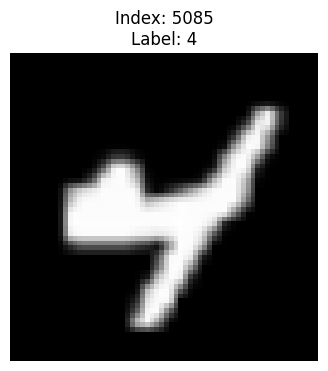

In [11]:
# Plot a single image at index 42 (replace with your desired index)
plot_single_image(data, labels, index=5085)

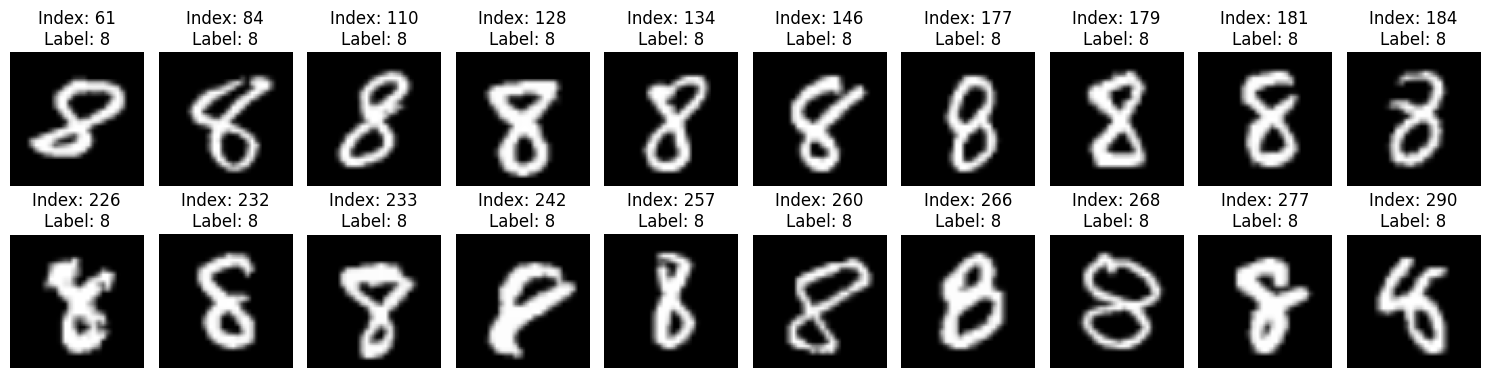

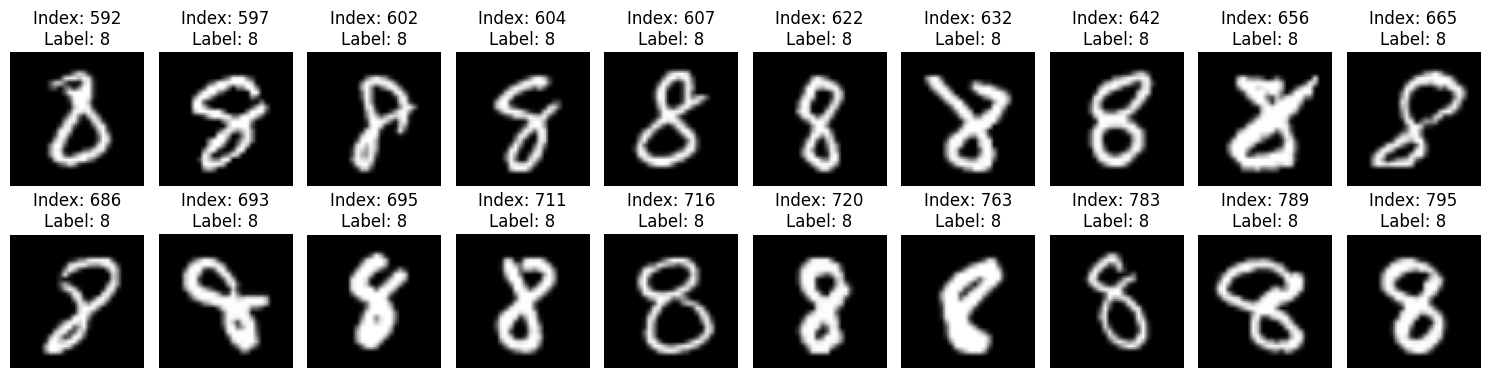

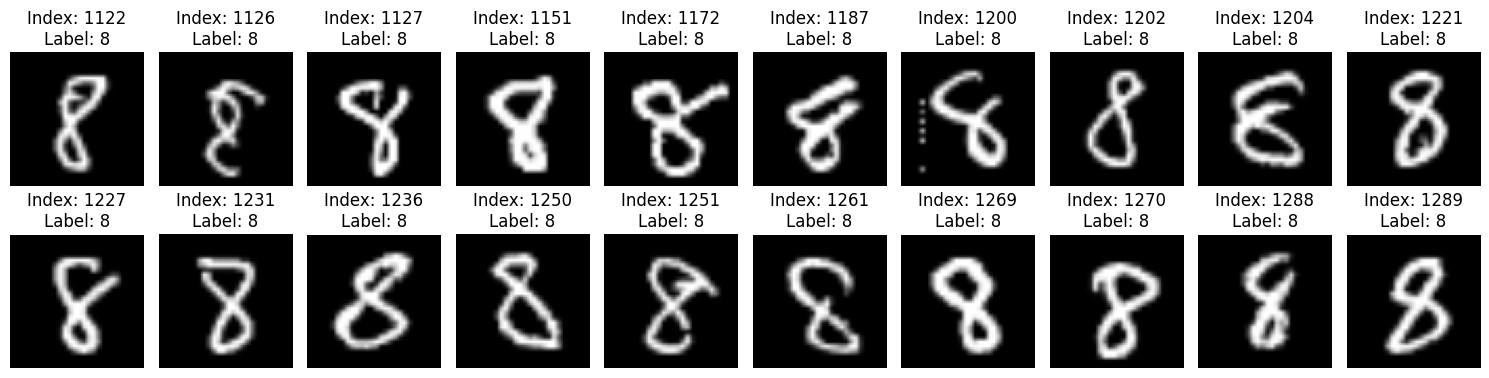

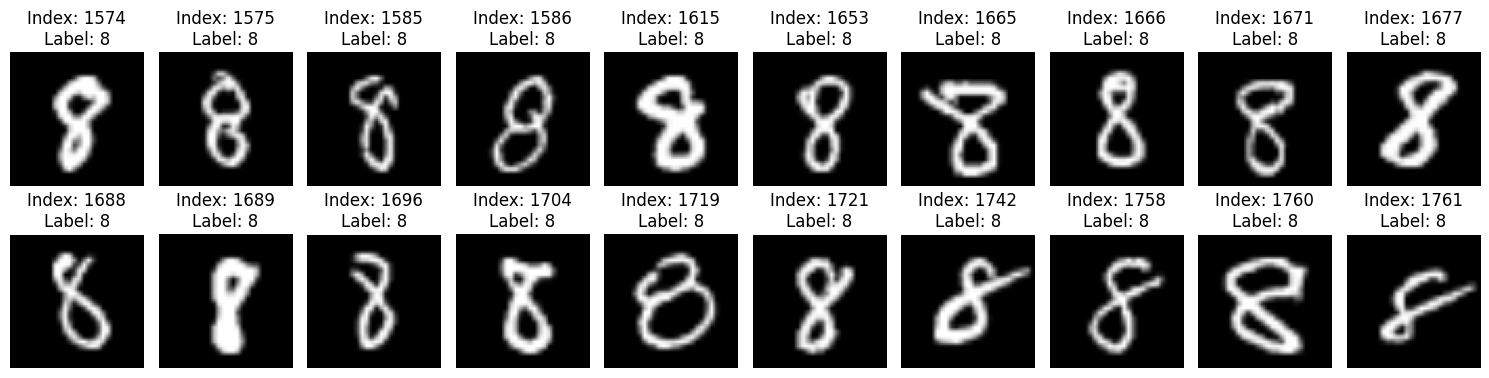

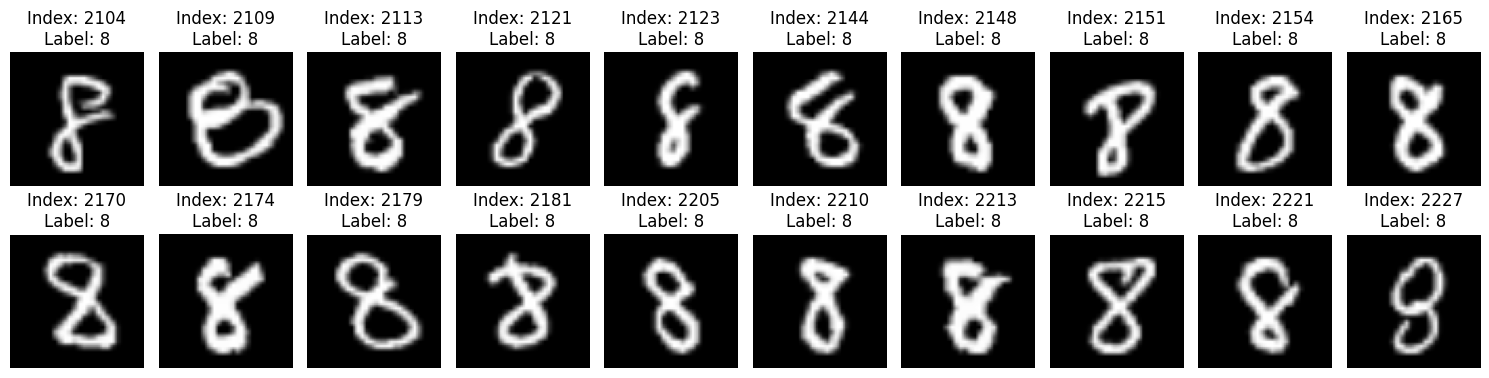

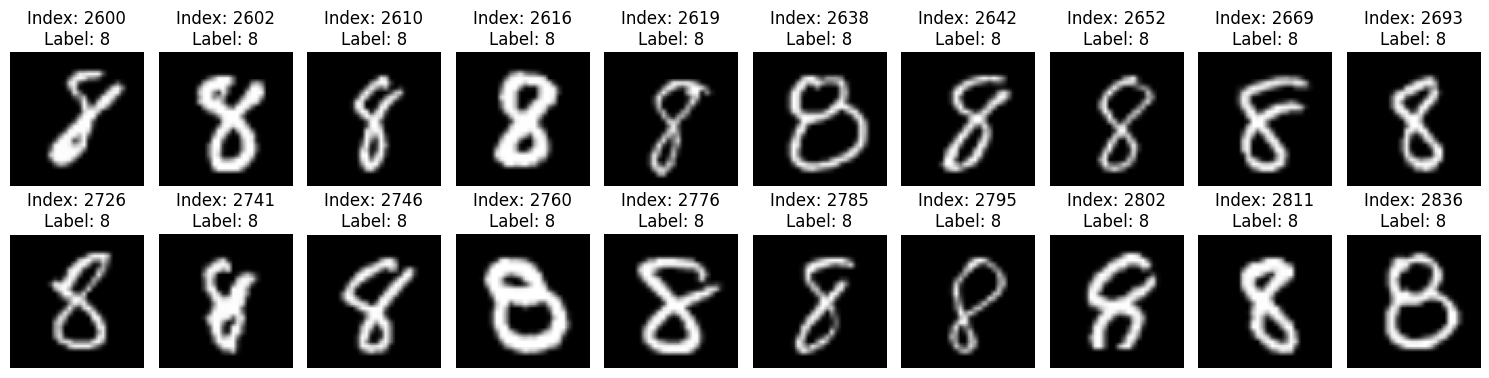

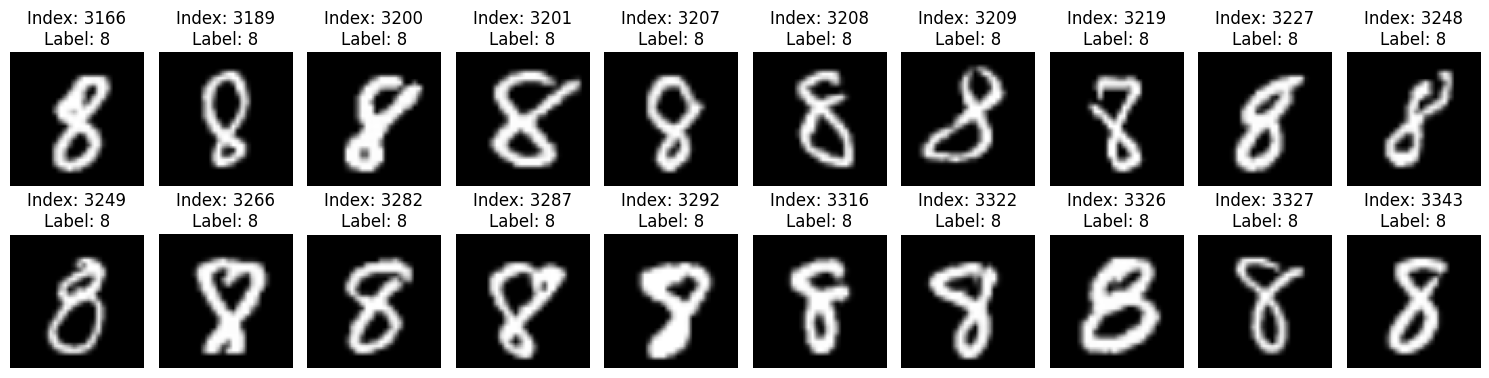

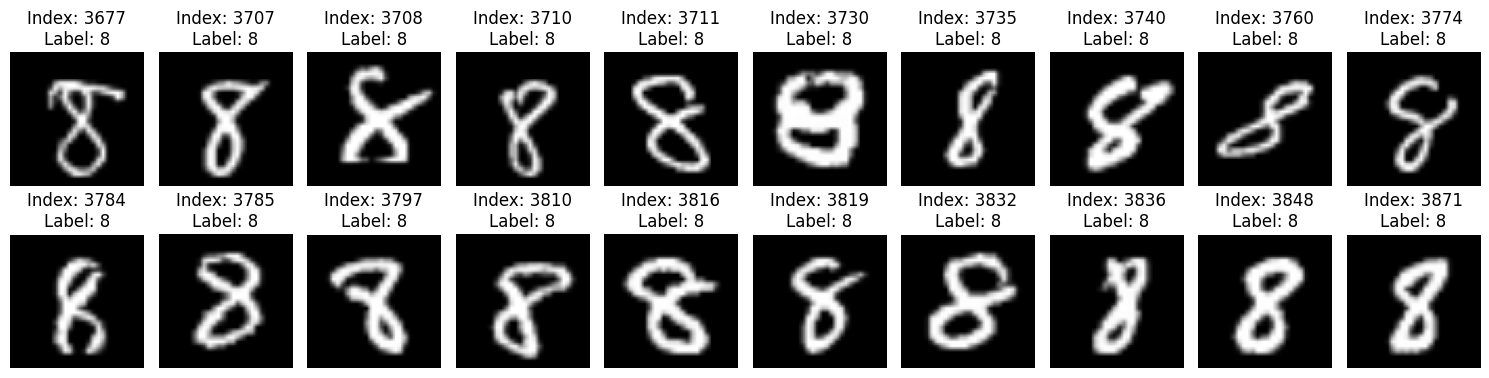

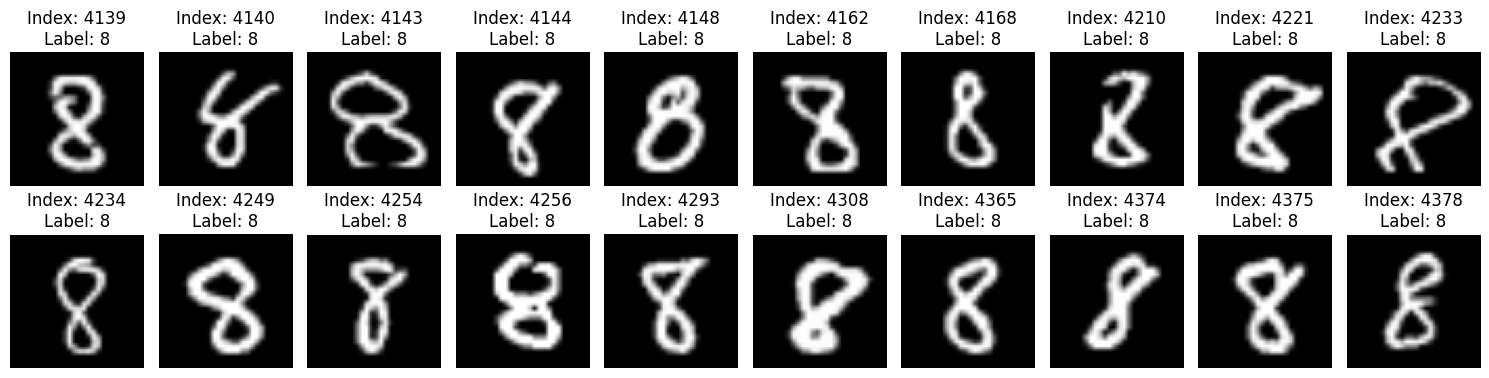

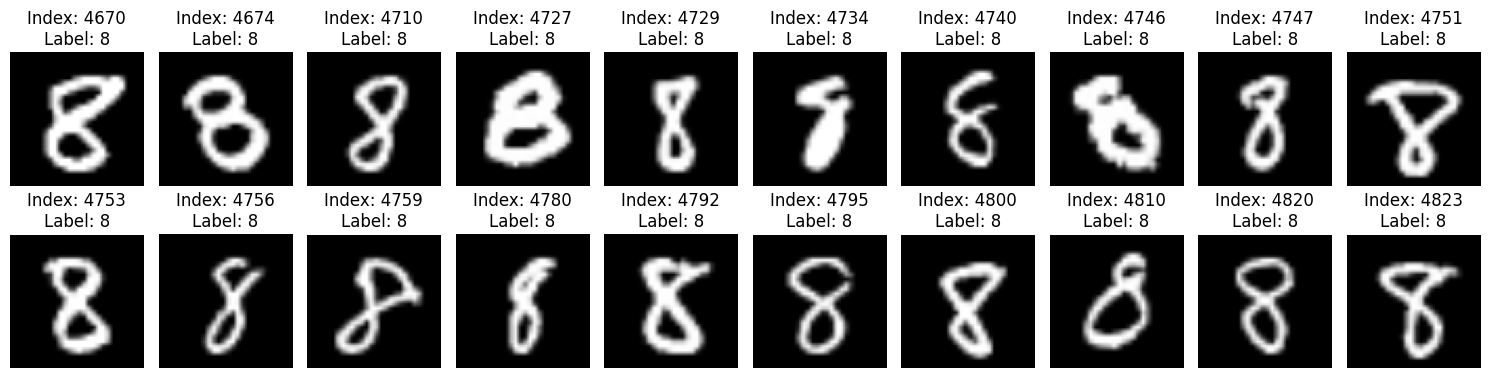

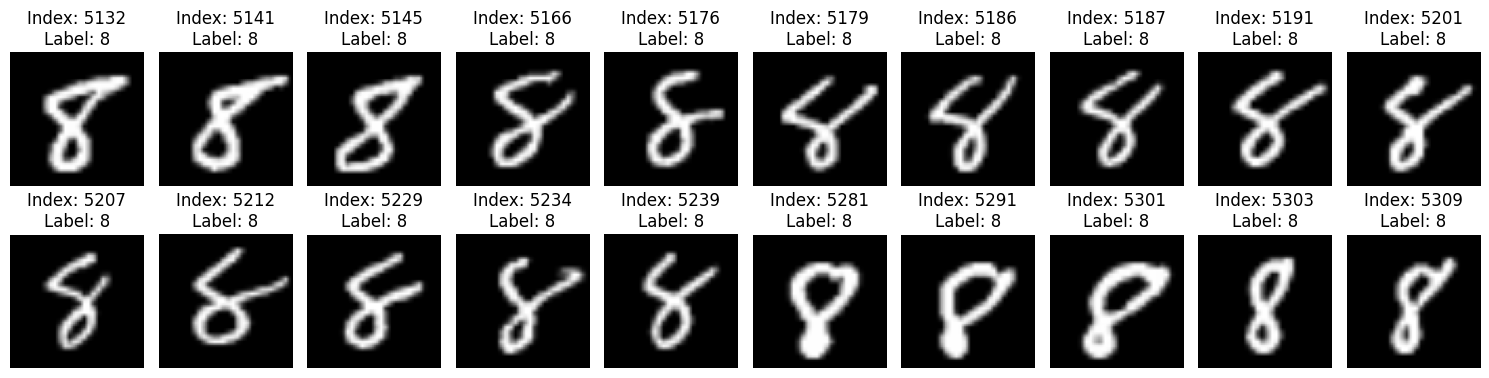

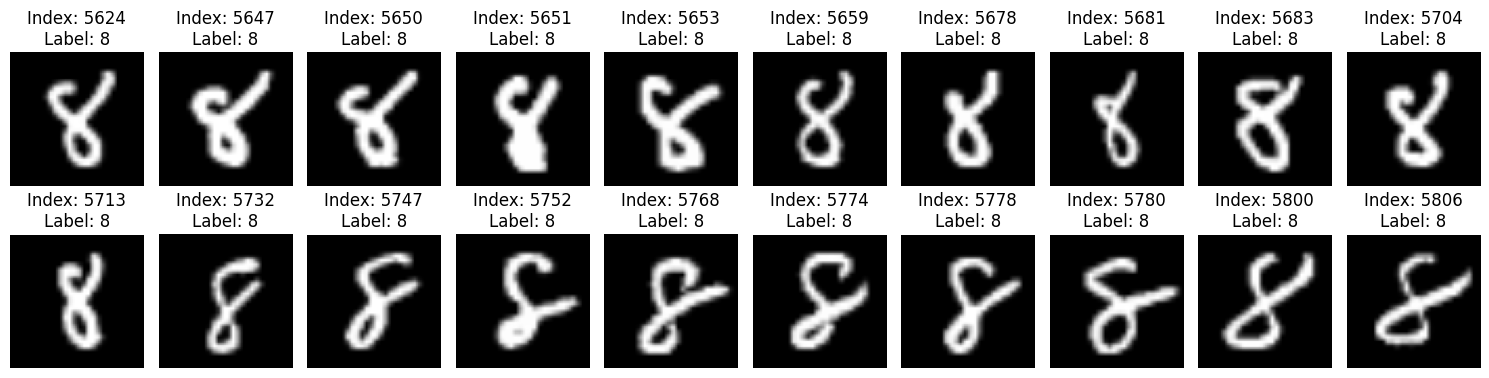

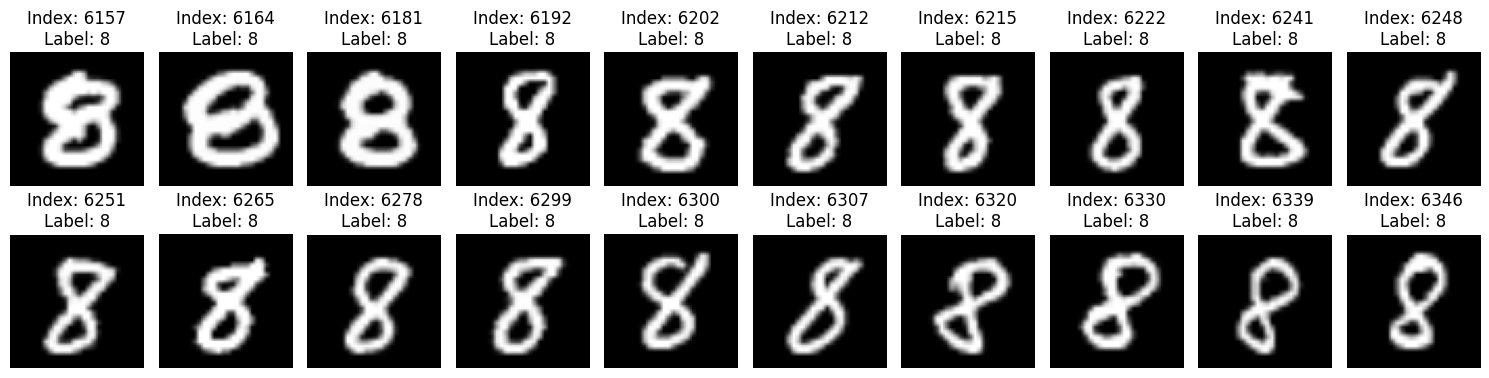

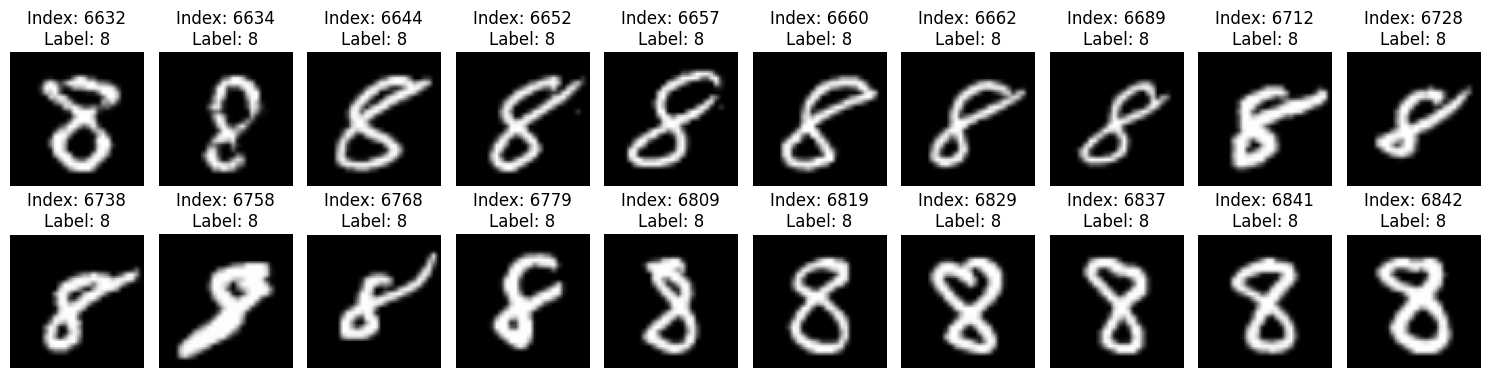

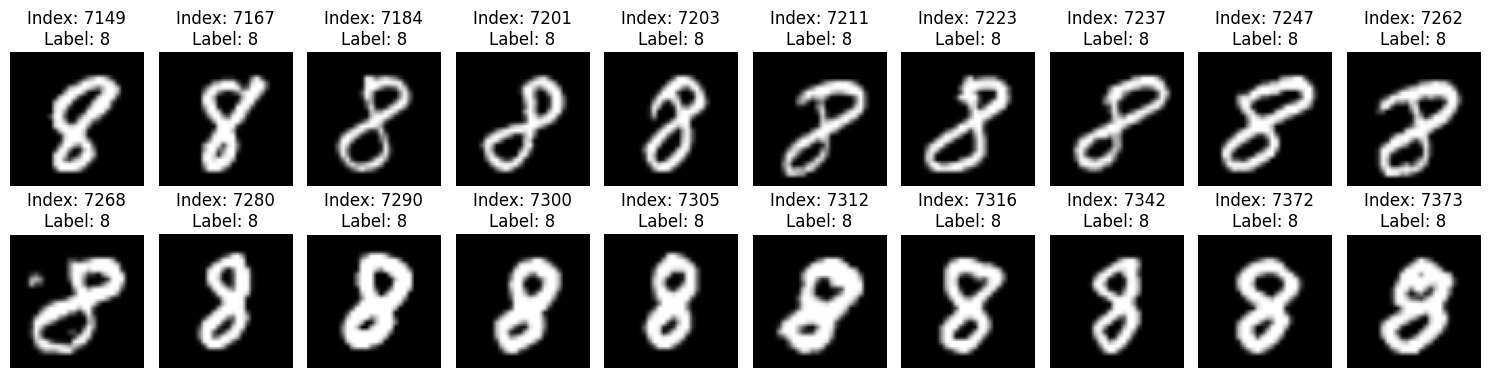

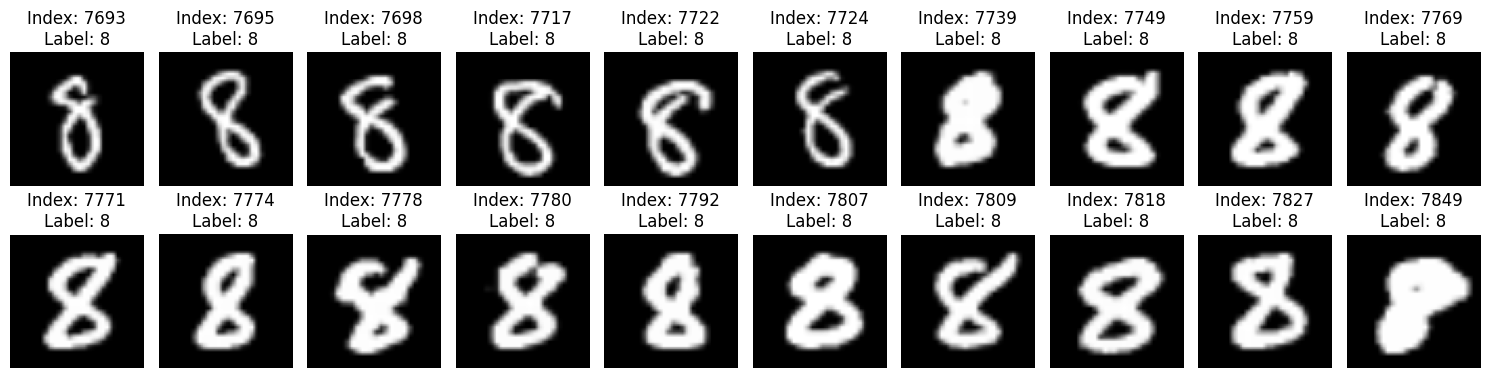

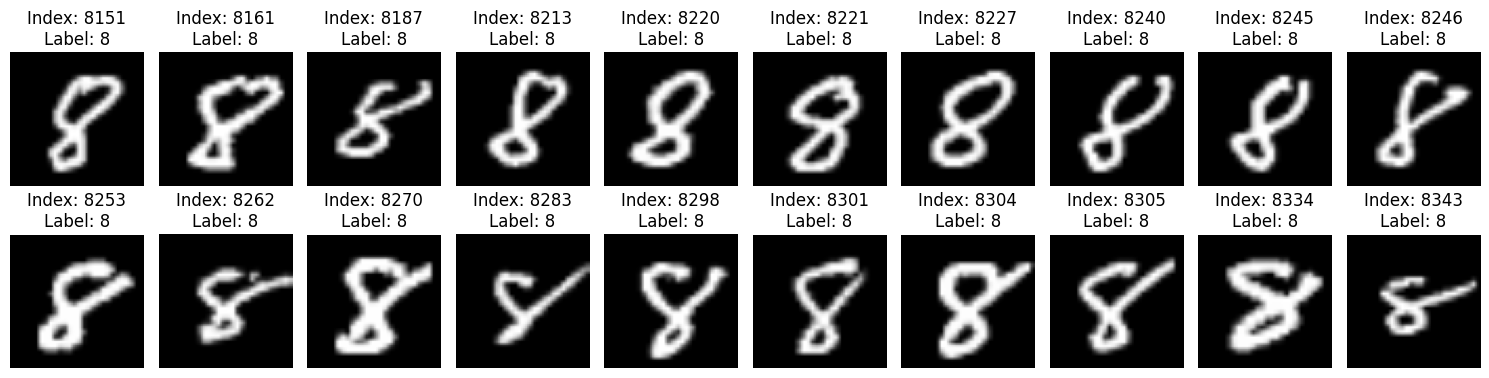

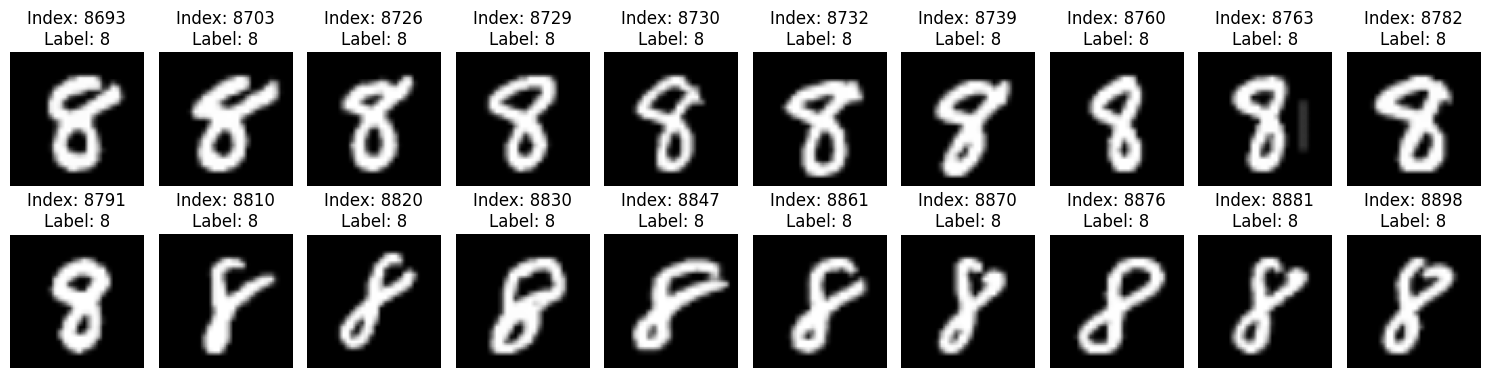

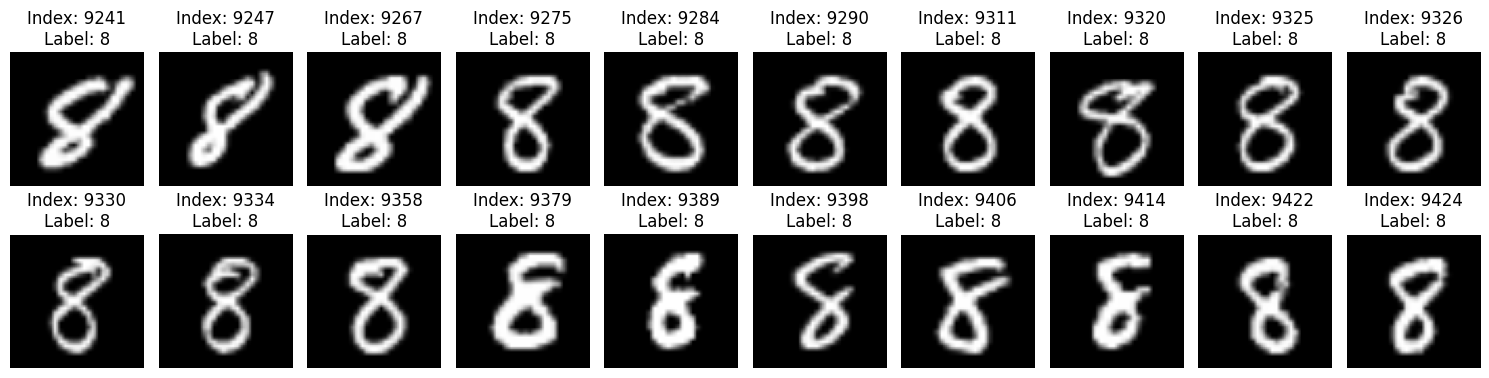

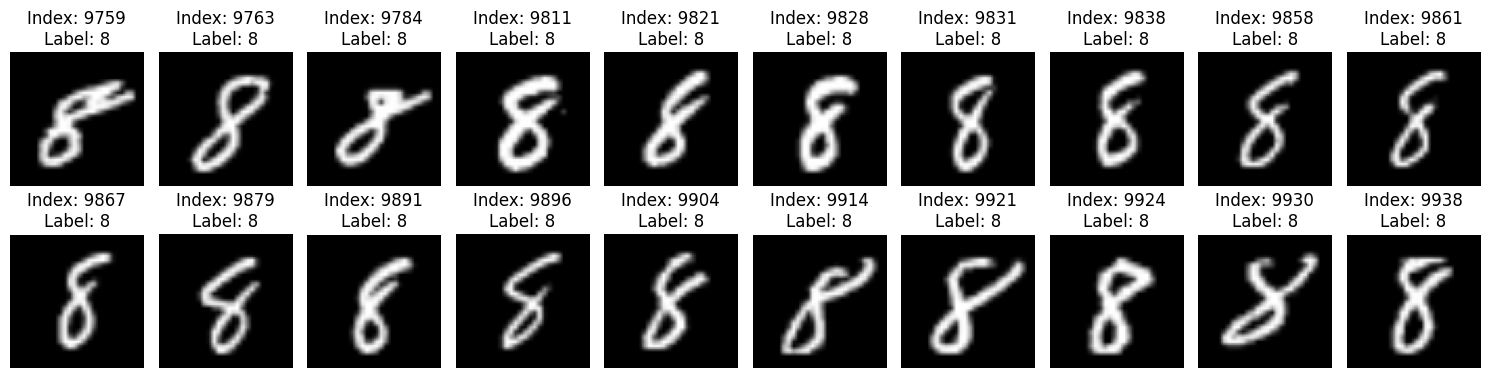

In [20]:
# Plot images in batches of 50
plot_selected_images(data, labels, {8}, batch_size=50)